In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from src.nielsen_helpers import weights_dataframe
from src.helpers import set_size
import numpy as np


In [3]:
# Latex Configuration
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as dates

params = {
    "axes.titlesize": 14,
    'axes.labelsize': 14,
    'font.size': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'arial',
    'mathtext.fontset': 'cm',
    'mathtext.rm': 'serif',
    'text.usetex': False
}

mpl.rcParams.update(params)

# Loads data

In [4]:
start_date, end_date = "2020-05-01", "2021-07-01"

path = "/data/deplatforming/data/tmp_wall/df_fringe_to_weight_{}_to_{}.csv".format(start_date, end_date)
df_fringe = pd.read_csv(path)
df_fringe.activitydatetime = pd.to_datetime(df_fringe.activitydatetime)

path = "/data/deplatforming/data/tmp_wall/df_mainstream_to_weight_{}_to_{}.csv".format(start_date, end_date)
df_mainstream = pd.read_csv(path)
df_mainstream.activitydatetime = pd.to_datetime(df_mainstream.activitydatetime)

path = "/data/deplatforming/data/tmp_wall/df_all_to_weight_{}_to_{}.csv".format(start_date, end_date)
df_all = pd.read_csv(path)
df_all.activitydatetime = pd.to_datetime(df_all.activitydatetime)

In [5]:
start_date, end_date = "2020-05-01", "2021-07-01"

path = "/data/deplatforming/data/tmp_wall/df_fringe_to_weight_{}_to_{}_mob.csv".format(start_date, end_date)
df_fringe_mob = pd.read_csv(path)
df_fringe_mob.activitydatetime = pd.to_datetime(df_fringe_mob.activitydatetime)

path = "/data/deplatforming/data/tmp_wall/df_mainstream_to_weight_{}_to_{}_mob.csv".format(start_date, end_date)
df_mainstream_mob = pd.read_csv(path)
df_mainstream_mob.activitydatetime = pd.to_datetime(df_mainstream_mob.activitydatetime)

path = "/data/deplatforming/data/tmp_wall/df_all_to_weight_{}_to_{}_mob.csv".format(start_date, end_date)
df_all_mob = pd.read_csv(path)
df_all_mob.activitydatetime = pd.to_datetime(df_all_mob.activitydatetime)

# Weights data

In [6]:
ocols = ['age', 'gender', 'marital_status', 'edulevelid', 'educationdesc', 'incomeid',
         'incomedesc', 'emplstatusid', 'employmentstatusdesc', 'raceid',
         'racedesc', 'hispanicoriginid', 'hispanicorigindesc',
         'agegroup', 'spanish_language1']

w_all_mob, acc_plot_x_mob, acc_plot_y_mob, acc_plot_z_mob = weights_dataframe(df_all_mob,
                                                                              weight_cols_to_keep=ocols)
w_all_mob["viewduration_w"] = w_all_mob["duration"] * w_all_mob["personweight"]
w_all_mob["viewduration"] = w_all_mob["duration"]


/data/anaconda3/lib/python3.9/site-packages/charset_normalizer/api.py:105: UserWarning: Trying to detect encoding from a tiny portion of (29) byte(s).
  warn('Trying to detect encoding from a tiny portion of ({}) byte(s).'.format(length))


In [7]:
ocol = ["age", "gender_id", "race_id", "education_id", "income_group_id", "hispanic_origin_id"]
pathv = "s3://epfl-collaboration-paspkaoe1nx9ptad1k8rjh5maact6use1a-s3alias/"
w_all, acc_plot_x, acc_plot_y, acc_plot_z = weights_dataframe(df_all,
                                                              weight_cols_to_keep=ocol,
                                                              nol_id_col="nol_id",
                                                              weightcol="combo_visitors_weight",
                                                              is_mobile=False,
                                                              pathv=pathv)

w_all["viewduration_w"] = w_all["viewduration"] * w_all["combo_visitors_weight"]

In [11]:
display(w_all_mob)
display(w_all)


,index,mobile_id,activitydatetime,is_app,duration,personweight,age,gender,marital_status,edulevelid,...,emplstatusid,employmentstatusdesc,raceid,racedesc,hispanicoriginid,hispanicorigindesc,agegroup,spanish_language1,viewduration_w,viewduration
0,0,2628,2020-08-02,False,24.0,9110.0,33.0,M,Married,106.0,...,31.0,Employed part time (less than 30 hours per week),85.0,White,84.0,"No, not of Hispanic origin",5.0,6.0,218640.0,24.0
1,1,2628,2020-08-09,False,90.0,9110.0,33.0,M,Married,106.0,...,31.0,Employed part time (less than 30 hours per week),85.0,White,84.0,"No, not of Hispanic origin",5.0,6.0,819900.0,90.0
2,2,2628,2020-08-16,False,164.0,9110.0,33.0,M,Married,106.0,...,31.0,Employed part time (less than 30 hours per week),85.0,White,84.0,"No, not of Hispanic origin",5.0,6.0,1494040.0,164.0
3,3,2628,2020-08-23,False,121.0,9110.0,33.0,M,Married,106.0,...,31.0,Employed part time (less than 30 hours per week),85.0,White,84.0,"No, not of Hispanic origin",5.0,6.0,1102310.0,121.0
4,4,2628,2020-08-25,True,665.0,9110.0,33.0,M,Married,106.0,...,31.0,Employed part time (less than 30 hours per week),85.0,White,84.0,"No, not of Hispanic origin",5.0,6.0,6058150.0,665.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413454,667859,5425858,2021-05-28,True,12224.0,15911.0,55.0,M,Unmarried,104.0,...,301.0,Retired,85.0,White,84.0,"No, not of Hispanic origin",8.0,6.0,194496064.0,12224.0
6413455,667860,5425858,2021-05-29,False,381.0,15911.0,55.0,M,Unmarried,104.0,...,301.0,Retired,85.0,White,84.0,"No, not of Hispanic origin",8.0,6.0,6062091.0,381.0
6413456,667861,5425858,2021-05-29,True,14618.0,15911.0,55.0,M,Unmarried,104.0,...,301.0,Retired,85.0,White,84.0,"No, not of Hispanic origin",8.0,6.0,232586998.0,14618.0
6413457,667862,5425858,2021-05-30,False,220.0,15911.0,55.0,M,Unmarried,104.0,...,301.0,Retired,85.0,White,84.0,"No, not of Hispanic origin",8.0,6.0,3500420.0,220.0


,index,nol_id,activitydatetime,viewduration,url,combo_visitors_weight,age,gender_id,race_id,education_id,income_group_id,hispanic_origin_id,viewduration_w
0,0,201000007550100,2020-08-03,11124.0,293,1018.0,47,1,2,7,6,1,11324232.0
1,1,201000007550100,2020-08-05,19048.0,66,1018.0,47,1,2,7,6,1,19390864.0
2,2,201000007550100,2020-08-06,31889.0,353,1018.0,47,1,2,7,6,1,32463002.0
3,3,201000007550100,2020-08-07,6486.0,109,1018.0,47,1,2,7,6,1,6602748.0
4,4,201000007550100,2020-08-08,18960.0,206,1018.0,47,1,2,7,6,1,19301280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656877,466788,610998524930100,2021-05-26,15230.0,154,1228.0,65,1,1,5,3,1,18702440.0
4656878,466789,610998524930100,2021-05-27,3030.0,59,1228.0,65,1,1,5,3,1,3720840.0
4656879,466790,610998524930100,2021-05-28,3349.0,40,1228.0,65,1,1,5,3,1,4112572.0
4656880,466791,610998524930100,2021-05-29,2642.0,72,1228.0,65,1,1,5,3,1,3244376.0


# Tables!

In [19]:
def f(df):
    df = df.drop_duplicates("nol_id")
    denom = len(df) / 100
    
    pct_18_20 = ((df.age >= 18) & (df.age <= 20)).sum() / denom
    pct_21_44 = ((df.age >= 21) & (df.age <= 44)).sum() / denom
    pct_45_64 =  ((df.age >= 45) & (df.age <= 64)).sum() / denom
    pct_65p = (df.age >= 65).sum() / denom
    

    # gender/race/ethnicity
    pct_women = (df.gender_id == 2).sum() / denom
    pct_black = (df.race_id == 2).sum() / denom
    pct_aapi = (df.race_id == 3).sum() / denom
    pct_aian = (df.race_id == 4).sum() / denom
    pct_hispanic = (df.hispanic_origin_id.apply(lambda x: x not in [-1, 1])).sum() / denom

    # education
    pct_grammar = (df.education_id == 1).sum() / denom
    pct_shs = (df.education_id == 2).sum() / denom
    pct_hs = (df.education_id == 3).sum() / denom
    pct_sc = (df.education_id == 4).sum() / denom
    pct_ad = (df.education_id == 5).sum() / denom
    pct_c = (df.education_id == 6).sum() / denom
    pct_cp = (df.education_id > 6).sum() / denom

    # income
    pct_0_25k = (df.income_group_id == 1).sum() / denom
    pct_25_50k = (df.income_group_id == 2).sum() / denom
    pct_50_75k = (df.income_group_id == 3).sum() / denom
    pct_75_100k = (df.income_group_id == 4).sum() / denom
    pct_100kp = ((df.income_group_id == 5) | (df.income_group_id == 6)).sum() / denom

    return pd.Series({" ": " ",
                      "N": round(len(df), 0),
                      "Women": round(pct_women, 1),
                      "Black": round(pct_black, 1),
                      "AAPI": round(pct_aapi, 1),
                      "AIAN": round(pct_aian, 1),
                      "Hispanic": round(pct_hispanic, 1),
                      "HS or less": round(pct_hs + pct_shs + pct_grammar, 1),
                      "Some college": round(pct_sc + pct_ad, 1),
                      "College graduate": round(pct_c, 1),
                      "Graduate+": round(pct_cp, 1),
                      "[0, 25k)": round(pct_0_25k, 1),
                      "[25k, 50k)": round(pct_25_50k, 1),
                      "[50k, 75k)": round(pct_50_75k, 1),
                      "[75k, 100k)": round(pct_75_100k, 1),
                      "100k+": round(pct_100kp, 1),
                      "18 to 20 years": round(pct_18_20, 1),
                      "21 to 44 years": round(pct_21_44, 1),
                      "45 to 64 years": round(pct_45_64, 1),
                      "65 years or older": round(pct_65p, 1),
                      
                      })
tmp1 = f(w_all)
tmp1

                          
N                    76677
Women                 62.8
Black                 17.7
AAPI                   3.8
AIAN                   1.3
Hispanic              12.9
HS or less            28.7
Some college          41.1
College graduate      20.3
Graduate+              9.9
[0, 25k)              23.9
[25k, 50k)            28.4
[50k, 75k)            19.8
[75k, 100k)           12.5
100k+                 15.3
18 to 20 years         6.2
21 to 44 years        43.4
45 to 64 years        31.5
65 years or older     13.9
dtype: object

In [21]:
def f(df):
    df = df.drop_duplicates("mobile_id")
    

    
    denom = len(df) / 100
    
    pct_18_20 = ((df.age >= 18) & (df.age <= 20)).sum() / denom
    pct_21_44 = ((df.age >= 21) & (df.age <= 44)).sum() / denom
    pct_45_64 =  ((df.age >= 45) & (df.age <= 64)).sum() / denom
    pct_65p = (df.age >= 65).sum() / denom
    
    #     # gender/race/ethnicity
    pct_women = (df.gender == 'F').sum() / denom
    pct_black = (df.raceid == 86).sum() / denom
    pct_aapi = (df.raceid == 88).sum() / denom
    pct_aian = (df.raceid == 89).sum() / denom
    pct_hispanic = (df.hispanicoriginid == 83).sum() / denom

    # education
    pct_grammar = (df.edulevelid == 101).sum() / denom
    pct_shs = (df.edulevelid == 102).sum() / denom
    pct_hs = (df.edulevelid == 103).sum() / denom
    pct_sc = (df.edulevelid == 104).sum() / denom
    pct_ad = (df.edulevelid == 105).sum() / denom
    pct_c = (df.edulevelid == 106).sum() / denom
    pct_cp = (df.edulevelid > 106).sum() / denom

    # income
    pct_0_25k = (df.incomeid == 21).sum() / denom
    pct_25_50k = (df.incomeid == 23).sum() / denom
    pct_50_75k = (df.incomeid == 24).sum() / denom
    pct_75_100k = (df.incomeid == 25).sum() / denom
    pct_100kp = (df.incomeid > 25).sum() / denom

    return pd.Series({" ": " ",
                      "N": round(len(df), 0),
                      "Women": round(pct_women, 1),
                      "Black": round(pct_black, 1),
                      "AAPI": round(pct_aapi, 1),
                      "AIAN": round(pct_aian, 1),
                      "Hispanic": round(pct_hispanic, 1),
                      "HS or less": round(pct_hs + pct_shs + pct_grammar, 1),
                      "Some college": round(pct_sc + pct_ad, 1),
                      "College graduate": round(pct_c, 1),
                      "Graduate+": round(pct_cp, 1),
                      "[0, 25k)": round(pct_0_25k, 1),
                      "[25k, 50k)": round(pct_25_50k, 1),
                      "[50k, 75k)": round(pct_50_75k, 1),
                      "[75k, 100k)": round(pct_75_100k, 1),
                      "100k+": round(pct_100kp, 1),
                      "18 to 20 years": round(pct_18_20, 1),
                      "21 to 44 years": round(pct_21_44, 1),
                      "45 to 64 years": round(pct_45_64, 1),
                      "65 years or older": round(pct_65p, 1),
                      })
f(w_all_mob)

                          
N                    36028
Women                 56.6
Black                 18.3
AAPI                   3.5
AIAN                   1.7
Hispanic              21.3
HS or less            29.7
Some college          42.5
College graduate      18.7
Graduate+              9.0
[0, 25k)              30.8
[25k, 50k)            29.4
[50k, 75k)            17.5
[75k, 100k)           10.4
100k+                 12.0
18 to 20 years         5.9
21 to 44 years        50.9
45 to 64 years        35.2
65 years or older      8.1
dtype: object

# Summary plots

Average #months desktop: 5.549890820158966
Average #months mobile: 4.458751173993395
Number of distinct panelists in the desktop panel : 76677
Number of distinct panelists in the mobile panel  : 36028


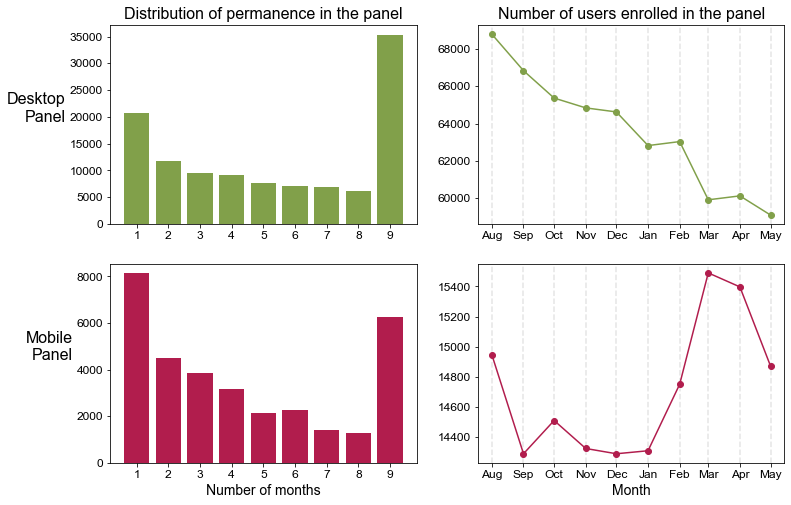

In [8]:
acc = {}
for i in acc_plot_z:
    for j in i:
        if j in acc:
            acc[j] += 1
        else:
            acc[j] = 1
months = [k for _, k in acc.items()]
print("Average #months desktop:", np.mean(months))

acc = {}
for i in acc_plot_z_mob:
    for j in i:
        if j in acc:
            acc[j] += 1
        else:
            acc[j] = 1
fig, axs = plt.subplots(2, 2, figsize=(11, 7))
axs = axs.T
months_mob = [k for _, k in acc.items()]
print("Average #months mobile:", np.mean(months_mob))

axs[0, 0].hist(months, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], rwidth=0.8, align="left", color="#81a04a")
axs[0, 0].set_xticks(list(range(1, 10)))
axs[0, 0].set_ylabel("Desktop\nPanel", rotation=0, ha="right", size=16)
axs[0, 0].set_title("Distribution of permanence in the panel", size=16)

axs[0, 1].hist(months_mob, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], rwidth=0.8, align="left", color="#b11d4d")
axs[0, 1].set_xticks(list(range(1, 10)))
axs[0, 1].set_ylabel("Mobile\nPanel", rotation=0, ha="right", size=16)
axs[0, 1].set_xlabel("Number of months")

myFmt = dates.DateFormatter('%b')
axs[1, 0].set_title("Number of users enrolled in the panel", size=16)

axs[1, 0].plot(acc_plot_x, acc_plot_y, color="#81a04a")
axs[1, 0].scatter(acc_plot_x, acc_plot_y, color="#81a04a", marker="o")
axs[1, 0].xaxis.set_major_formatter(myFmt)

axs[1, 1].plot(acc_plot_x_mob, acc_plot_y_mob, color="#b11d4d")
axs[1, 1].scatter(acc_plot_x_mob, acc_plot_y_mob, color="#b11d4d", marker="o")
axs[1, 1].xaxis.set_major_formatter(myFmt)
axs[1, 1].set_xlabel("Month")

for ax in [axs[1, 1], axs[1, 0]]:
    for xmaj in ax.xaxis.get_majorticklocs():
        ax.axvline(x=xmaj, ls='--', alpha=0.1, color="black", zorder=-2)

set_size(fig, (11, 7))

print("Number of distinct panelists in the desktop panel :", len(set(w_all.nol_id)))
print("Number of distinct panelists in the mobile panel  :", len(set(w_all_mob.mobile_id)))
fig.savefig("./images/users_in_panel.pdf", bbox_inches="tight", dpi=300)

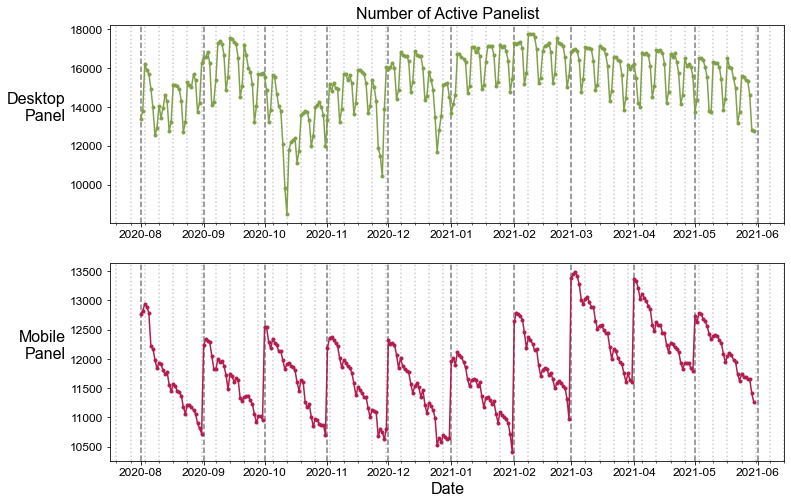

In [10]:
def weighted_agg(df, is_mobile=False):
    try:
        users = df.drop_duplicates("mobile_id").mobile_id.nunique()
        usersw = df.drop_duplicates("mobile_id").personweight.sum()
    except:
        users = df.drop_duplicates("nol_id").nol_id.nunique()
        usersw = df.drop_duplicates("nol_id").combo_visitors_weight.sum()

    return pd.Series({
        "sumv": df.viewduration_w.sum(),
        "dur": df.viewduration.sum(),
        "users": users,
        "usersw": usersw
    })


val = "users"
fig, axs_ = plt.subplots(2, 1, figsize=(11, 7))
t1 = w_all[w_all.combo_visitors_weight > 0].groupby([pd.Grouper(key="activitydatetime", freq="D")])\
    .apply(weighted_agg)[val]
axs_[0].plot(t1.index, t1.values, color="#81a04a")
axs_[0].scatter(t1.index, t1.values, color="#81a04a", marker=".")

t2 = w_all_mob[w_all_mob.personweight > 0].groupby([pd.Grouper(key="activitydatetime", freq="D")])\
    .apply(weighted_agg)[val]
axs_[1].plot(t2.index, t2.values, color="#b11d4d")
axs_[1].scatter(t2.index, t2.values, color="#b11d4d", marker=".")

axs_[0].set_title("Number of Active Panelist", size=16)
axs_[0].set_ylabel("Desktop\nPanel", rotation=0, ha="right", size=16)
axs_[1].set_ylabel("Mobile\nPanel", rotation=0, ha="right", size=16)
axs_[1].set_xlabel("Date", size=16)

for axs in axs_:
    axs.xaxis.set_major_locator(dates.MonthLocator(interval=1))
    axs.xaxis.set_minor_locator(dates.DayLocator(interval=7))
    for xmaj in axs.xaxis.get_majorticklocs():
        axs.axvline(x=xmaj, ls='--', alpha=0.5, color="black", zorder=-2)
    for xmin in axs.xaxis.get_minorticklocs():
        axs.axvline(x=xmin, ls=':', alpha=0.2, color="black", zorder=-2)

set_size(fig, (11, 7))
fig.savefig("./images/users_in_panel2.pdf", bbox_inches="tight", dpi=300)